<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Replication-of-McMillen-et-al.-(2017)" data-toc-modified-id="Replication-of-McMillen-et-al.-(2017)-1">Replication of McMillen et al. (2017)</a></span><ul class="toc-item"><li><span><a href="#Load-and-prepare-data" data-toc-modified-id="Load-and-prepare-data-1.1">Load and prepare data</a></span><ul class="toc-item"><li><span><a href="#Schools" data-toc-modified-id="Schools-1.1.1">Schools</a></span></li><li><span><a href="#Routes" data-toc-modified-id="Routes-1.1.2">Routes</a></span><ul class="toc-item"><li><span><a href="#Add-treatment-indicator-from-schools" data-toc-modified-id="Add-treatment-indicator-from-schools-1.1.2.1">Add treatment indicator from schools</a></span></li></ul></li><li><span><a href="#Monthly-crime-rates" data-toc-modified-id="Monthly-crime-rates-1.1.3">Monthly crime rates</a></span><ul class="toc-item"><li><span><a href="#Only-blocks-which-are-in-at-least-one-year-treated-or-one,-two,-or-three-cells-over" data-toc-modified-id="Only-blocks-which-are-in-at-least-one-year-treated-or-one,-two,-or-three-cells-over-1.1.3.1">Only blocks which are in at least one year treated or one, two, or three cells over</a></span></li></ul></li><li><span><a href="#Blocks-with-running-variable-for-Figure-3" data-toc-modified-id="Blocks-with-running-variable-for-Figure-3-1.1.4">Blocks with running variable for Figure 3</a></span><ul class="toc-item"><li><span><a href="#Aggregate" data-toc-modified-id="Aggregate-1.1.4.1">Aggregate</a></span></li></ul></li><li><span><a href="#Yearly-crime-counts" data-toc-modified-id="Yearly-crime-counts-1.1.5">Yearly crime counts</a></span></li></ul></li><li><span><a href="#Replication-of-descriptives" data-toc-modified-id="Replication-of-descriptives-1.2">Replication of descriptives</a></span><ul class="toc-item"><li><span><a href="#Figure-A.2" data-toc-modified-id="Figure-A.2-1.2.1">Figure A.2</a></span></li><li><span><a href="#Table-1" data-toc-modified-id="Table-1-1.2.2">Table 1</a></span></li><li><span><a href="#Table-2" data-toc-modified-id="Table-2-1.2.3">Table 2</a></span></li><li><span><a href="#Figure-3" data-toc-modified-id="Figure-3-1.2.4">Figure 3</a></span></li></ul></li><li><span><a href="#Replication-of-main-results" data-toc-modified-id="Replication-of-main-results-1.3">Replication of main results</a></span><ul class="toc-item"><li><span><a href="#Table-10-(column-3-and-7)" data-toc-modified-id="Table-10-(column-3-and-7)-1.3.1">Table 10 (column 3 and 7)</a></span></li></ul></li></ul></li><li><span><a href="#Additional-figures-for-website" data-toc-modified-id="Additional-figures-for-website-2">Additional figures for website</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1">Load data</a></span><ul class="toc-item"><li><span><a href="#Blocks-with-crimes" data-toc-modified-id="Blocks-with-crimes-2.1.1">Blocks with crimes</a></span></li><li><span><a href="#Routes" data-toc-modified-id="Routes-2.1.2">Routes</a></span></li><li><span><a href="#Hourly-crime-counts" data-toc-modified-id="Hourly-crime-counts-2.1.3">Hourly crime counts</a></span></li></ul></li><li><span><a href="#Plot-blocks-with-dummies" data-toc-modified-id="Plot-blocks-with-dummies-2.2">Plot blocks with dummies</a></span></li><li><span><a href="#Plot-violent-crime-trends" data-toc-modified-id="Plot-violent-crime-trends-2.3">Plot violent crime trends</a></span><ul class="toc-item"><li><span><a href="#Hourly-counts" data-toc-modified-id="Hourly-counts-2.3.1">Hourly counts</a></span></li></ul></li></ul></li></ul></div>

**Description**: This notebook creates all figures and displays the results used on the website [Chicago's Safe Passage Program to Prevent Crime: Is It Worth the Dime?](https://binste.github.io/chicago_safepassage_evaluation/). Some of the figures, descriptive statistics and the main results are a replication of the census block results from [McMillen et al. (2017)](https://ignaciomsarmiento.github.io/assets/Safe_Passage_WP.pdf). Therefore, the first part of the notebook will make direct comparisons to the relevant parts of the beforementioned paper. The second part produces additional figures for the website which are unrelated to McMillen et al. (2017).

In [1]:
import pickle
import sys
from pathlib import Path

import altair as alt
import geopandas as gpd
import pandas as pd
import numpy as np
import ipywidgets as widgets

sys.path.append('../..')
from src.analysis.figures import format_chart, save_to_jekyll
from src.prepare_data.crime_database import load_relevant_crimes

In [2]:
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Set path to data folder

In [3]:
project_folder = Path('../..')
data_path = project_folder / 'data'

# Replication of McMillen et al. (2017)
Only main results of census block specification.

## Load and prepare data

### Schools

In [4]:
with (data_path / 'processed/schools_blocks.pkl').open('rb') as f:
    schools = pickle.load(f)
schools['treated'] = schools['treated_foia']
schools = schools.drop('treated_foia', axis='columns')

### Routes

In [5]:
with (data_path / 'processed/routes.pkl').open('rb') as f:
    routes = pickle.load(f)

#### Add treatment indicator from schools

Add earlier school years

In [6]:
school_years = ['SY0910', 'SY1011', 'SY1112', 'SY1213']
earlier_routes = []
routes_1314 = routes.query('school_year == "SY1314"')
for sy in school_years:
    temp_routes = routes_1314.copy()
    temp_routes['school_year'] = sy
    earlier_routes.append(temp_routes)

routes = pd.concat([routes] + earlier_routes, ignore_index=True)

In [7]:
assert not routes.duplicated(subset=['school_year', 'route_number']).any()

In [8]:
routes = routes.merge(
    schools[['school_name', 'school_year', 'treated']],
    how='left',
    on=['school_name', 'school_year'], validate='m:1')

### Monthly crime rates

#### Only blocks which are in at least one year treated or one, two, or three cells over

In [9]:
with (data_path / 'processed/est_df.pkl').open('rb') as f:
    est_df = pickle.load(f)
est_df.head()

,tract_bloc,school_year,Date,violent_count,property_count,route_number,school_name,treated,one_over,two_over,three_over,info,time_fe
0,208011000.0,SY0506,2006-01-31,0.0,0.0,NaN,NaN,0.0,0,0,0,-,200601
1,208011000.0,SY0506,2006-02-28,0.0,0.0,NaN,NaN,0.0,0,0,0,-,200602
2,208011000.0,SY0506,2006-03-31,0.0,0.0,NaN,NaN,0.0,0,0,0,-,200603
3,208011000.0,SY0506,2006-04-30,0.0,0.0,NaN,NaN,0.0,0,0,0,-,200604
4,208011000.0,SY0506,2006-05-31,0.0,1.0,NaN,NaN,0.0,0,0,0,-,200605


According to Table 10 in McMillen et al. (2017), they had a sample size of 783,340 for the main specification. It is unclear, why I got more than double the observations.

In [10]:
est_df['school_year'].unique()

array(['SY0506', 'SY0607', 'SY0708', 'SY0809', 'SY0910', 'SY1011',
       'SY1112', 'SY1213', 'SY1314', 'SY1415', 'SY1516'], dtype=object)

### Blocks with running variable for Figure 3

In [11]:
with (data_path / 'processed/figures/blocks_fig_3.pkl').open('rb') as f:
    blocks_fig_3 = pickle.load(f)

#### Aggregate

In [12]:
blocks_fig_3.head()

,tract_bloc,school_year,violent_count,property_count,treated,one_over,two_over,three_over,info,run_var_treated,run_var_one,run_var_two,run_var_three,run_var,block_status
3,208011000.0,SY0809,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-5.0,-5.0,Three over
4,208011000.0,SY0910,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-4.0,-4.0,Three over
5,208011000.0,SY1011,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-3.0,-3.0,Three over
6,208011000.0,SY1112,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-2.0,-2.0,Three over
7,208011000.0,SY1213,0.0,0.0,0.0,0,0,0,-,NaN,NaN,NaN,-1.0,-1.0,Three over


In [13]:
blocks_fig_3 = blocks_fig_3.groupby(['run_var', 'block_status']).agg({
    'violent_count':
    'mean',
    'property_count':
    'mean'
}).reset_index()

In [14]:
blocks_fig_3.head()

,run_var,block_status,violent_count,property_count
0,-5.0,One over,0.255826,1.123252
1,-5.0,Three over,0.205269,0.949273
2,-5.0,Treated,0.418735,1.427542
3,-5.0,Two over,0.275023,1.078512
4,-4.0,One over,0.235654,0.907661


### Yearly crime counts

In [15]:
with (data_path / 'processed/figures/violent_yearly_counts.pkl').open('rb') as f:
    yearly_crime_counts = pickle.load(f)
yearly_crime_counts['violent'] = yearly_crime_counts['violent'].map({0: 'Property', 1: 'Violent'})

## Replication of descriptives

### Figure A.2
![figure_a2](../../reports/figures/mcmillen_fig_a2.png)

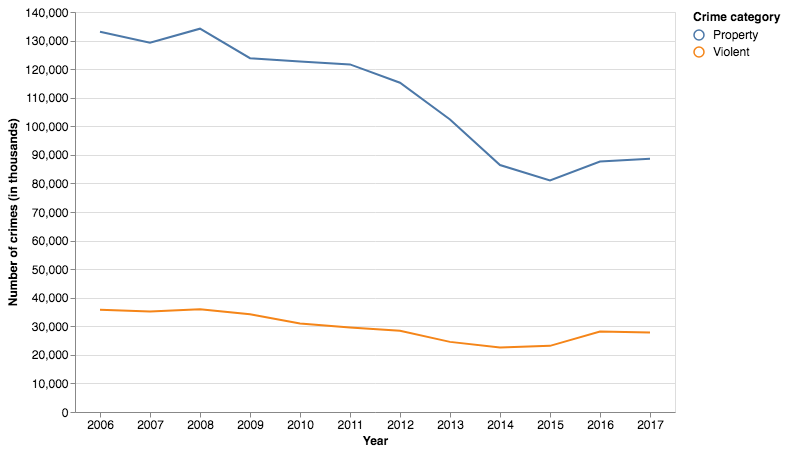

In [16]:
yearly_violent_trend = format_chart(alt.Chart(yearly_crime_counts).mark_line().encode(
    alt.X('Date:O', axis=alt.Axis(title='Year', labelAngle=0)),
    alt.Y('count:Q', axis=alt.Axis(title='Number of crimes (in thousands)')),
    alt.Color('violent:N',
              legend=alt.Legend(title='Crime category'))))
yearly_violent_trend

In [17]:
save_to_jekyll(yearly_violent_trend, 'yearly_violent_trend')

### Table 1
![table_1](../../reports/figures/mcmillen_tab_1.png)

In [18]:
table_1 = schools.groupby('school_year')['treated'].sum().diff().rename(
    'schools_added').reset_index()
table_1.loc[table_1['school_year'] == 'SY0910', 'schools_added'] = schools.loc[
    schools['school_year'] == 'SY0910', 'treated'].sum()
table_1_routes = routes.groupby('school_year')['treated'].sum().diff().rename(
    'routes_added').reset_index()
table_1_routes.loc[table_1_routes['school_year'] == 'SY0910',
                   'routes_added'] = routes.loc[routes['school_year'] ==
                                                'SY0910', 'treated'].sum()
table_1 = pd.merge(table_1_routes, table_1, how='inner', on='school_year')
table_1 = pd.concat(
    [
        table_1,
        pd.DataFrame.from_dict([{
            'school_year': 'total',
            'routes_added': table_1['routes_added'].sum(),
            'schools_added': table_1['schools_added'].sum()
        }])
    ],
    sort=True,
    ignore_index=True)
table_1 = table_1[['school_year', 'routes_added', 'schools_added']]
table_1

,school_year,routes_added,schools_added
0,SY0910,32.0,35.0
1,SY1011,0.0,0.0
2,SY1112,0.0,0.0
3,SY1213,4.0,4.0
4,SY1314,50.0,53.0
5,SY1415,34.0,41.0
6,SY1516,3.0,3.0
7,total,123.0,136.0


### Table 2
![table_2](../../reports/figures/mcmillen_tab_2.png)

### Figure 3

>*"Given the phased way the program was implemented, we normalize to a common start and show the averages for the five pre-program years and for three post-program years. Figure 3a and 3b show that the program was indeed implemented in areas with higher crime incidents but there are no obvious differences in trends before the program implementation. Furthermore, control cells show no significant differences in levels or trends. What is more, after the implementation in the program there’s a drop in the average number of crimes when compared to control areas."* - McMillen et al. (2017), p. 10

Assumption: For figure, drop all blocks which switch status.

![Figure 3](../../reports/figures/mcmillen_fig_3.png)

In [19]:
def make_crime_block_chart(count_col):
    implementation_info = pd.DataFrame([{'implement_year': -0.5}])

    base = alt.Chart().mark_line(clip=True).encode(
        alt.X(
            'run_var:Q',
            axis=alt.Axis(
                title='School years before/after implementation of SP program',
                values=list(range(-5, 3)),
                format='.1'),
            scale=alt.Scale(domain=[-5, 3])),
        alt.Y(
            f'{count_col}',
            axis=alt.Axis(title='Crime count per school year')),
        alt.Color(
            'block_status:N',
            title='Block status',
            sort=[
                'Treated', 'One over', 'Two over',
                'Three over'
            ]))

    
    implementation_rule = alt.Chart(implementation_info).mark_rule().encode(
        x='implement_year:Q')

    implementation_text = alt.Chart(implementation_info).mark_text(
        angle=270, dy=-5, dx=-100).encode(
            alt.X('implement_year:Q'), text=alt.value('Implementation'))

    return alt.layer(
        base.transform_filter('datum.run_var < 0'),
        base.transform_filter('datum.run_var >= 0').encode(
            alt.Color(
                'block_status:N',
                sort=[
                    'Treated', 'One over', 'Two over',
                    'Three over'
                ],
                legend=None)),
        implementation_rule,
        implementation_text,
        data=blocks_fig_3[[
            'run_var',
            count_col,
            'block_status',
        ]],
        # Makes legends independent of one another (needed for sorting to work)
        resolve=alt.Resolve(
            scale=alt.LegendResolveMap(color=alt.ResolveMode('independent'))))


out_violent_crimes = widgets.Output()
out_property_crimes = widgets.Output()

tab = widgets.Tab()
tab.children = [out_violent_crimes, out_property_crimes]
tab.set_title(0, 'Violent crimes')
tab.set_title(1, 'Property crimes')

fig3_violent = format_chart(make_crime_block_chart('violent_count'))
fig3_property = format_chart(make_crime_block_chart('property_count'))

with out_violent_crimes:
    fig3_violent.display()

with out_property_crimes:
    fig3_property.display()

tab

Crime levels are way higher in replication figure. This is certainly at least in part explainable by the different unit of measurement. For this figure they used artificially constructed cells of 1/8th mile on 1/8th mile squares. The census blocks I used have on average a higher area.

Save for use on website

In [20]:
save_to_jekyll(fig3_violent, 'did_figure_violent')
save_to_jekyll(fig3_property, 'did_figure_property')

## Replication of main results

### Table 10 (column 3 and 7)
![table_10](../../reports/figures/mcmillen_tab_10.png)

The poisson regression is run in `0.0-binste-estimation-poisson.ipynb`. The estimation notebook can NOT be run in mybinder.org due to resource constraints.

In [21]:
results_violent = pd.read_csv('../../models/summary_poisson_violent.csv')
results_violent

,var,coef,se,z,p,n
0,treated,-0.133810,0.024804,-5.394745,6.862095e-08,1085334
1,one_over,0.009624,0.024244,0.396950,6.914045e-01,1085334
2,two_over,-0.004373,0.024365,-0.179467,8.575707e-01,1085334


In [22]:
results_property = pd.read_csv('../../models/summary_poisson_property.csv')
results_property

,var,coef,se,z,p,n
0,treated,-0.004190,0.013136,-0.318989,0.749735,1085334
1,one_over,0.011522,0.012533,0.919355,0.357910,1085334
2,two_over,0.021531,0.012167,1.769625,0.076790,1085334


# Additional figures for website
The figures in the following are for the website only and do not directly belong to the replication.

Care with this setting. `max_rows=None` should only be used when exporting to html. Don't display large figures in this notebook!

In [23]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

## Load data

### Blocks with crimes
This dataset contains an observation per block per school year

In [24]:
with (data_path / 'processed/figures/blocks_with_dummies.pkl').open('rb') as f:
    blocks_dummies = pickle.load(f)
blocks_dummies = blocks_dummies[['tract_bloc', 'school_year', 'info']]
assert not blocks_dummies.duplicated(subset=['tract_bloc', 'school_year']).any()
blocks_dummies.head()

,tract_bloc,school_year,info
0,101001000,SY0506,-
1,101001001,SY0506,-
2,101001002,SY0506,-
3,101001003,SY0506,-
4,101002000,SY0506,-


### Routes

In [25]:
with (data_path / 'processed/routes.pkl').open('rb') as f:
    routes = pickle.load(f)
routes.head()

,school_name,school_id,school_year,route_number,geometry
0,Bass,609791,SY1516,26,(LINESTRING (-87.65435458421847 41.77415375372...
1,Haley,609808,SY1516,21,(LINESTRING (-87.63829660445114 41.67785424533...
2,Wentworth,610223,SY1516,22,(LINESTRING (-87.66139078533355 41.76494287260...
3,Mays,610290,SY1516,23,(LINESTRING (-87.64702376241898 41.77243973026...
4,Nicholson Tech Acad,609793,SY1516,24,(LINESTRING (-87.65473745700072 41.78870650844...


### Hourly crime counts

In [26]:
with (data_path / 'processed/figures/violent_hourly_counts.pkl').open('rb') as f:
    hourly_counts = pickle.load(f)

## Plot blocks with dummies

In [27]:
dummy_trend = blocks_dummies.groupby('school_year')['info'].apply(
    lambda x: x.value_counts()).reset_index().rename(
        {
            'level_1': 'block_status',
            'info': 'count'
        }, axis='columns').query('block_status != "-"')

dummy_trend['block_status'] = dummy_trend['block_status'].map({
    'treated':
    'Treated',
    'one over':
    'One over',
    'two over':
    'Two over',
    'three over':
    'Three over'
})

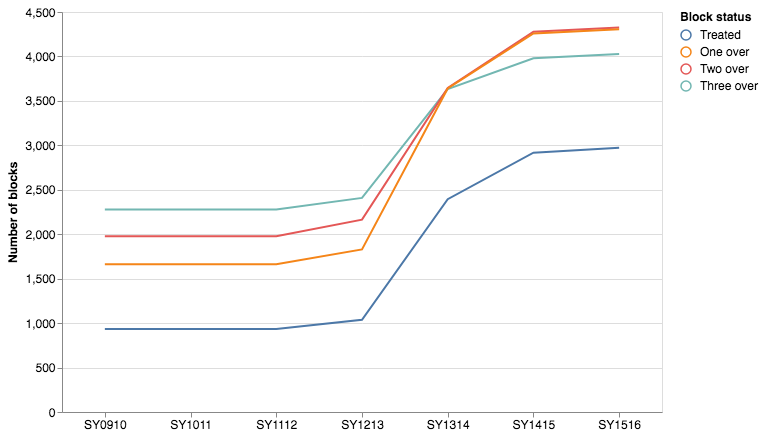

In [28]:
block_trend = format_chart(
    alt.Chart(dummy_trend).mark_line().encode(
        alt.X('school_year:O', axis=alt.Axis(labelAngle=0, title='')),
        alt.Y('count:Q', axis=alt.Axis(title='Number of blocks')),
        alt.Color(
            'block_status:N',
            sort=['Treated', 'One over', 'Two over', 'Three over'],
            legend=alt.Legend(title='Block status'))).properties(width=600))
block_trend

In [29]:
save_to_jekyll(block_trend, 'block_trend')

## Plot violent crime trends

### Hourly counts

Color scheme will be reversed by `save_to_jekyll` function.

In [30]:
def plot_violent_trends():
    single = alt.selection_single(on='click', encodings=['x'])

    month = alt.Chart().mark_rect().encode(
        x=alt.X(
            'Date:O', timeUnit='year', axis=alt.Axis(title='Year',
                                                     labelAngle=-60)),
        y=alt.Y('Date:O', timeUnit='month', axis=alt.Axis(title='Month')),
        color=alt.condition(
            single,
            alt.Color(
                'mean(count):Q',
                legend=alt.Legend(title="Mean violent crime count"),
                scale=alt.Scale(scheme='redyellowgreen')),
            alt.value('lightgray'))).properties(selection=single)

    hours = alt.Chart().mark_rect().encode(
        x=alt.X(
            'Date:O',
            timeUnit='hours',
            axis=alt.Axis(title='Hour of Day', labelAngle=-60)),
        y=alt.Y('Date:O', timeUnit='month', axis=alt.Axis(title='Month')),
        color=alt.Color(
            'mean(count):Q',
            legend=alt.Legend(title="Mean violent crime count"),
            scale=alt.Scale(scheme='redyellowgreen')),
    ).transform_filter(single)

    return alt.vconcat(
        month,
        hours,
        data=hourly_counts.query('violent == 1'),
        resolve=alt.Resolve(
            scale=alt.LegendResolveMap(color=alt.ResolveMode('independent'))))

The first time we create the plot we won't display it as it is too large for the notebook. We will only use this one for exporting it for the website. Afterwards we enable a different data transformer from the package Altair, which will allow us to do so.

In [31]:
violent_trend = plot_violent_trends()

In [32]:
save_to_jekyll(violent_trend, 'violent_trend', reverse_colors=True)

In [33]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

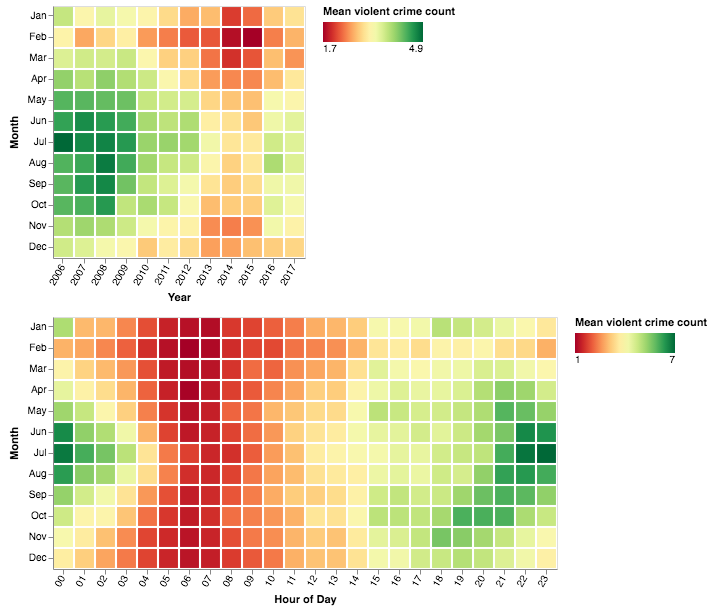

In [34]:
plot_violent_trends()